In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# [5, -2, 7] -> [0.3, 0.1, 0.7]

In [5]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
    
        

In [6]:
torch.manual_seed(32)
model = Model()

In [11]:
df = pd.read_csv("Data/iris.csv")
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


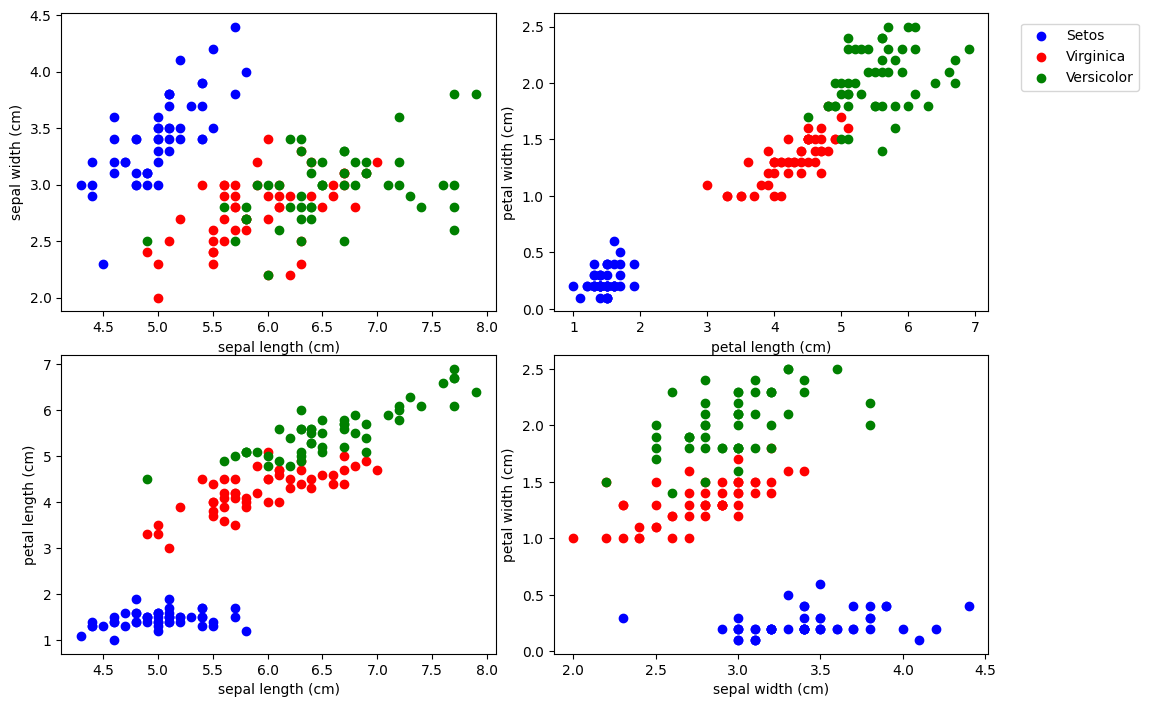

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.tight_layout()

plots = [(0, 1), (2, 3), (0, 2), (1, 3)]

colors = ["b", "r", "g"]

labels = ["Setos", "Virginica", "Versicolor"]

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]

        ax.scatter(df[df["target"] == j][x], df[df["target"] == j][y], color=colors[j])

        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1, 0.85))
plt.show()



In [19]:
# train test split

X = df.drop("target", axis=1).values

In [20]:
y = df['target'].values

In [21]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [23]:
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=True)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [34]:
epochs = 100
losses = []

for i in range(1, epochs+1):

    y_pred = model.forward(X_train)

    loss = criterion(y_pred, y_train)
    losses.append(loss)

    if i % 10 == 0:
        print(f"Epoch: {i:2} loss: {loss.item():10.8f}")

    # propagacja wstecz:
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Epoch: 10 loss: 0.04181879
Epoch: 20 loss: 0.04176276
Epoch: 30 loss: 0.04171225
Epoch: 40 loss: 0.04166704
Epoch: 50 loss: 0.04190162
Epoch: 60 loss: 0.04215575
Epoch: 70 loss: 0.04194188
Epoch: 80 loss: 0.04158852
Epoch: 90 loss: 0.04152117
Epoch: 100 loss: 0.04151436


Text(0.5, 0, 'epochs')

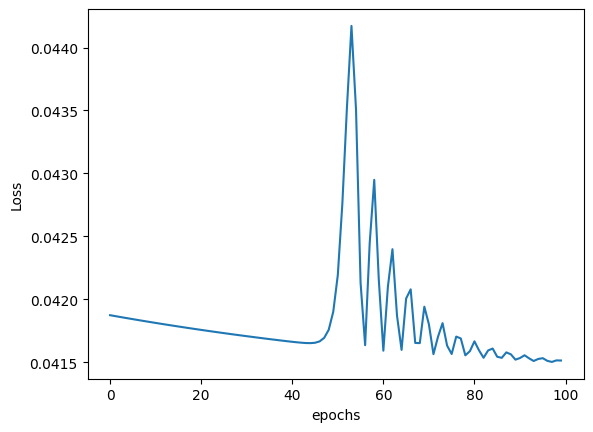

In [35]:
plt.plot(range(epochs), [loss.detach().numpy() for loss in losses])
plt.ylabel("Loss")
plt.xlabel("epochs")

In [27]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

loss

tensor(0.0581)

In [43]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        data = data.unsqueeze(0)
        
        y_val = model.forward(data)

        # y_val = model(data)

        print(y_val)
        pred_val = torch.softmax(y_val, dim=1).argmax()

        print(y_test[i] == pred_val)

tensor([[-3.5764,  8.4357, -1.3294]])
tensor(True)
tensor([[-3.9432,  9.0908, -1.3334]])
tensor(True)
tensor([[  9.9090,   1.3468, -14.3713]])
tensor(True)
tensor([[-6.3978,  8.0382,  2.0360]])
tensor(True)
tensor([[-11.2525,   5.6510,   8.8634]])
tensor(True)
tensor([[-16.0050,   2.6677,  15.6675]])
tensor(True)
tensor([[  9.5460,   1.7278, -14.1728]])
tensor(True)
tensor([[ 10.6148,   1.2051, -15.1930]])
tensor(True)
tensor([[-11.7362,   5.1773,   9.5737]])
tensor(True)
tensor([[-15.2007,   3.4074,  14.4108]])
tensor(True)
tensor([[-15.8425,   3.0095,  15.3168]])
tensor(True)
tensor([[  9.9456,   1.1180, -14.2265]])
tensor(True)
tensor([[-14.9571,   2.8991,  14.3929]])
tensor(True)
tensor([[-6.2300,  7.8888,  1.9256]])
tensor(True)
tensor([[-12.6642,   4.5238,  10.9531]])
tensor(True)
tensor([[-3.6068,  8.9330, -1.5754]])
tensor(True)
tensor([[-8.9917,  6.0156,  6.0435]])
tensor(True)
tensor([[ 10.7915,   1.2281, -15.4481]])
tensor(True)
tensor([[-6.2674,  7.7969,  1.9465]])
tensor(T

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
class IrisModel(keras.Model):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.dense1 = layers.Dense(h1, activation='relu')
        self.dense2 = layers.Dense(h2, activation='relu')
        self.out = layers.Dense(out_features)  # logits, softmax doda funkcja straty

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.out(x)

In [57]:
tf.random.set_seed(32)
model = IrisModel()
# wymuś utworzenie wag
_ = model(tf.zeros((1, 4)))

In [58]:
df = pd.read_csv('Data/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [59]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [60]:
batch_size = 60
train_ds = (tf.data.Dataset
            .from_tensor_slices((X_train, y_train))
            .shuffle(buffer_size=len(X_train), seed=33)
            .batch(batch_size))

test_ds = (tf.data.Dataset
           .from_tensor_slices((X_test, y_test))
           .batch(batch_size))

In [62]:
# --- inicjalizacja ---
tf.autograph.set_verbosity(0)
model_manual = IrisModel()
_ = model_manual(tf.zeros((1, 4)))   # rozgrzanie modelu

loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.01)

epochs = 250
losses = []

# --- pętla trenowania ---
for epoch in range(1, epochs + 1):
    epoch_loss = keras.metrics.Mean(name="epoch_loss")

    for batch_x, batch_y in train_ds:
        with tf.GradientTape() as tape:
            logits = model_manual(batch_x, training=True)
            loss_value = loss_fn(batch_y, logits)

        # oblicz i zastosuj gradienty
        grads = tape.gradient(loss_value, model_manual.trainable_variables)
        optimizer.apply_gradients(zip(grads, model_manual.trainable_variables))

        # zaktualizuj metrykę
        epoch_loss.update_state(loss_value)

    # zapisz wynik
    loss_float = epoch_loss.result().numpy()
    losses.append(loss_float)

    # log co 10 epokmystery_iris = tf.constant([5.6, 3.7, 2.2, 0.5], dtype=tf.float32)
    if epoch % 10 == 1:
        print(f"Epoch {epoch:2d} | Loss: {loss_float:.6f}")


2025-10-05 11:39:46.036009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.060331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.080452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.102261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.123777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.146599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.171626: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch  1 | Loss: 1.505511


2025-10-05 11:39:46.257805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.279979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.298822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.319610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.342620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.363148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.382359: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 11 | Loss: 0.612711


2025-10-05 11:39:46.463007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.483114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.504454: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.527336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.548934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.570090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.589064: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 21 | Loss: 0.453363


2025-10-05 11:39:46.665573: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.686264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.708415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.727186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.746420: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.766292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.786012: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 31 | Loss: 0.421214
Epoch 41 | Loss: 0.400402


2025-10-05 11:39:46.886319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.907227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.926353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.949142: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.971823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:46.992529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.017010: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 51 | Loss: 0.375786


2025-10-05 11:39:47.106495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.130925: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.151249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.170946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.191263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.211755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.231669: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 61 | Loss: 0.340751
Epoch 71 | Loss: 0.290856


2025-10-05 11:39:47.310752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.333307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.352424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.372021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.391629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.411091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.430844: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 81 | Loss: 0.236163
Epoch 91 | Loss: 0.177490


2025-10-05 11:39:47.733699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.754692: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.774932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.794211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.814914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.833596: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:47.854625: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 101 | Loss: 0.096615


2025-10-05 11:39:48.164378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.183887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.207743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.228509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.250550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.270018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.289664: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 111 | Loss: 0.074350
Epoch 121 | Loss: 0.070171


2025-10-05 11:39:48.372690: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.393354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.412997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.432867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.451096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.471358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.490216: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 131 | Loss: 0.064131


2025-10-05 11:39:48.800113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.824789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.848235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.870054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.891751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.914942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:48.936093: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 141 | Loss: 0.059040
Epoch 151 | Loss: 0.057763


2025-10-05 11:39:49.018607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.038816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.058086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.077266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.096736: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.114729: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.135773: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 161 | Loss: 0.065139


2025-10-05 11:39:49.437137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.457913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.477871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.501400: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.526894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.550526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.575257: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 171 | Loss: 0.060094


2025-10-05 11:39:49.643946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.666948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.688632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.709438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.730687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.752958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.776909: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 181 | Loss: 0.056592


2025-10-05 11:39:49.852719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.874974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.900570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.924243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.945186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.966131: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:49.989379: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 191 | Loss: 0.057257


2025-10-05 11:39:50.074901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.094996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.114833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.135201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.153025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.173066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.192701: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 201 | Loss: 0.057126


2025-10-05 11:39:50.293282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.313833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.333086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.351066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.369462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.389234: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.421232: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 211 | Loss: 0.056136


2025-10-05 11:39:50.507665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.528667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.549513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.569691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.588920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.609544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.630254: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 221 | Loss: 0.052079


2025-10-05 11:39:50.713445: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.738865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.760421: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.781096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.802113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.823079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.845762: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 231 | Loss: 0.051654


2025-10-05 11:39:50.934667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.954173: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.975810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:50.997911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:51.018735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:51.039903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:51.066876: W tensorflow/core/framework/local_rendezvous.cc:404] L

Epoch 241 | Loss: 0.051028


2025-10-05 11:39:51.150833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:51.171537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:51.190682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:51.211333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:51.231347: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-05 11:39:51.252133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [52]:
mystery_iris = tf.constant([5.6, 3.7, 2.2, 0.5], dtype=tf.float32)

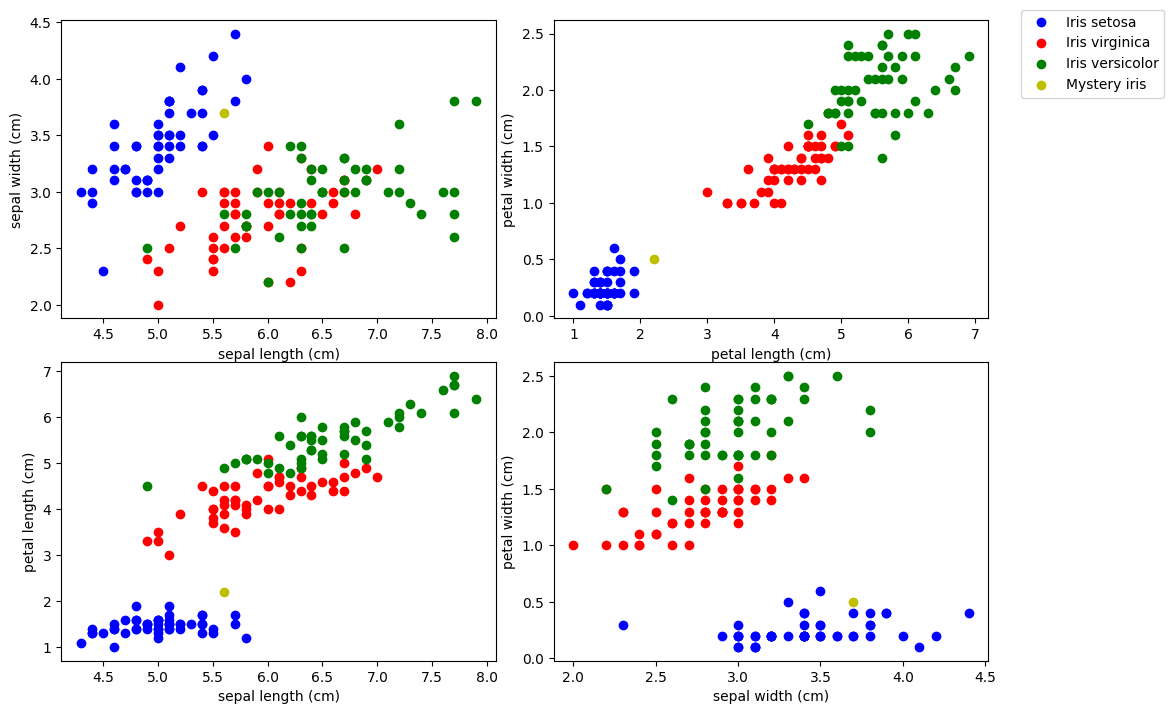

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

    # Dodaj wykres naszego tajemniczego irysa:
    ax.scatter(float(mystery_iris[plots[i][0]]), float(mystery_iris[plots[i][1]]), color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [65]:
logits = model(mystery_iris[tf.newaxis, :], training=False)
print(logits)
print()
print(labels[int(tf.argmax(logits, axis=1).numpy()[0])])

tf.Tensor([[-0.37107036  0.5159057  -2.9653156 ]], shape=(1, 3), dtype=float32)

Iris virginica


In [66]:
type(model)

__main__.IrisModel